In [1]:
# Imports

import pandas as pd
import re
import string
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import NMF, TruncatedSVD
from matplotlib import pyplot as plt
from operator import itemgetter
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Loading the dataset

df = pd.read_csv('philosophy_data.csv', usecols=[0, 1, 2, 4, 7])

In [3]:
df.head()

,title,author,school,sentence_str,sentence_length
0,Plato - Complete Works,Plato,plato,"What's new, Socrates, to make you leave your ...",125
1,Plato - Complete Works,Plato,plato,Surely you are not prosecuting anyone before t...,69
2,Plato - Complete Works,Plato,plato,The Athenians do not call this a prosecution b...,74
3,Plato - Complete Works,Plato,plato,What is this you say?,21
4,Plato - Complete Works,Plato,plato,"Someone must have indicted you, for you are no...",101


### Marcus Aurelius is an emperor and statesman rather than a philosopher. Therefore he would be dropped from the dataframe:

In [4]:
# Dropping of Marcus Aurelius (a play by Shakespeare!)

df.drop(df[df['author']=='Marcus Aurelius'].index, inplace=True)
df.reset_index(inplace=True)

<AxesSubplot:>

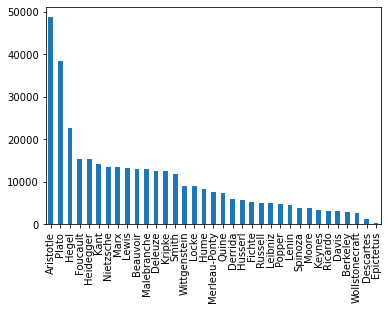

In [5]:
# The share of the texts by philospher 

philosopher_pcts = df['author'].value_counts()
philosopher_pcts.plot(kind='bar')

### Aristotle, Plato and Hegel have a large share of the excerpts. This is important as some normalization should be done for interpretation later. 

In [6]:
# The original designated schools

df['school'].unique()

array(['plato', 'aristotle', 'empiricism', 'rationalism', 'analytic',
       'continental', 'phenomenology', 'german_idealism', 'communism',
       'capitalism', 'stoicism', 'nietzsche', 'feminism'], dtype=object)

### Initial cleaning of the texts: 

In [7]:
# A function to remove punctuations, numbers and special characters

def pre_processor(array):
    numbers_removed = []
    all_removed = []
    for i in range(len(array)):
        numbers_removed.append(re.sub('\w*\d\w*', '', array.iloc[i]))
    for i in range(len(numbers_removed)):
        all_removed.append(re.sub('[%s]' % re.escape(string.punctuation), 
                                          ' ', numbers_removed[i]).lower())
    return all_removed

In [8]:
clean_text = pre_processor(df['sentence_str'])

In [9]:
df['clean_text'] = clean_text

In [10]:
df.head()

,index,title,author,school,sentence_str,sentence_length,clean_text
0,0,Plato - Complete Works,Plato,plato,"What's new, Socrates, to make you leave your ...",125,what s new socrates to make you leave your ...
1,1,Plato - Complete Works,Plato,plato,Surely you are not prosecuting anyone before t...,69,surely you are not prosecuting anyone before t...
2,2,Plato - Complete Works,Plato,plato,The Athenians do not call this a prosecution b...,74,the athenians do not call this a prosecution b...
3,3,Plato - Complete Works,Plato,plato,What is this you say?,21,what is this you say
4,4,Plato - Complete Works,Plato,plato,"Someone must have indicted you, for you are no...",101,someone must have indicted you for you are no...


### Now in order to automate the vectorization and topic modeling a bit, the following function would be defined. It would return the top 15 salient word for each combination of vectorizer and modeler: 

In [11]:
# Vectorization and modeler function

def make_topics(docs, vectorizer, topic_modeler, print_n_words=15):
    
    doc_word_vectors = vectorizer.fit_transform(docs)
    
    doc_topic_vectors = topic_modeler.fit_transform(doc_word_vectors)
    
    vocab = vectorizer.get_feature_names()
    for idx, topic in enumerate(topic_modeler.components_):
        top_words = [vocab[i].upper() for i in topic.argsort()[:-print_n_words-1:-1]]
        print(f"Topic {idx}:\n", ", ".join(top_words), "\n")
    
    print(topic_modeler.components_.shape)

### NMF modeler and TFIDFVectorizer:

In [12]:
docs = df['clean_text']
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.8, min_df=2)
topic_modeler = NMF(10, random_state=10, max_iter=1000) 

make_topics(docs, vectorizer, topic_modeler)

Topic 0:
 WORLD, NATURE, WAY, REASON, OBJECT, SENSE, POSSIBLE, FORM, KNOWLEDGE, BODY, CASE, CONSCIOUSNESS, SELF, IDEA, CONCEPT 

Topic 1:
 SAY, LIKE, LET, SHALL, RIGHT, SOCRATES, MEAN, PEOPLE, LL, JUST, DON, DID, YES, WANT, CASE 

Topic 2:
 THINGS, DIFFERENT, IDEAS, COME, EXIST, NATURE, GOD, MOTION, MIND, SENSIBLE, KIND, NUMBER, LIKE, USEFUL, PEOPLE 

Topic 3:
 MAN, GOOD, BAD, MEN, GOD, WOMAN, EVIL, LOVE, PLEASURE, LIFE, LIKE, JUST, ANIMAL, PEOPLE, MAKE 

Topic 4:
 DOES, MEAN, BELONG, EXIST, FOLLOW, BELONGS, COME, MAKE, FACT, HAPPEN, OCCUR, CONSIST, MATTER, PERSON, HOLD 

Topic 5:
 THING, DIFFERENT, SORT, KIND, IMPOSSIBLE, MOTION, MEAN, CAUSE, EXISTENCE, SUBSTANCE, BELONG, ESSENCE, EXISTS, PROPERTY, SINGLE 

Topic 6:
 TRUE, FALSE, IDEAS, PROPOSITION, TRUTH, STATEMENT, BELIEF, CONCLUSION, BELONGS, IDEA, USEFUL, PROPOSITIONS, SENTENCE, CERTAINLY, SENSE 

Topic 7:
 KNOW, THINK, DON, PEOPLE, DID, SOCRATES, BELIEVE, REALLY, MEN, KNOWLEDGE, ANSWER, CERTAINLY, UNDERSTAND, MEANS, QUESTION 

To

### NMF modeler and CountVectorizer:

In [13]:
docs = df['clean_text']
vectorizer = CountVectorizer(stop_words='english', max_df=0.8, min_df=2)
topic_modeler = NMF(10, random_state=10, max_iter=1000)  

make_topics(docs, vectorizer, topic_modeler, print_n_words=15)

Topic 0:
 REASON, WAY, OBJECT, FORM, BODY, SENSE, IDEA, KNOWLEDGE, SELF, CONCEPT, POSSIBLE, THOUGHT, GENERAL, IDEAS, CERTAIN 

Topic 1:
 MAN, WOMAN, LIFE, LIKE, MEN, ANIMAL, GOD, WHITE, GREAT, JUST, SAID, ANIMALS, LOVE, YOUNG, PROPERTY 

Topic 2:
 THINGS, DIFFERENT, IDEAS, KNOW, GOD, SAID, MIND, COME, MOTION, EXIST, KNOWLEDGE, KIND, WAY, THINK, LIKE 

Topic 3:
 TIME, SPACE, PRESENT, MOTION, PLACE, LONG, PAST, INFINITE, EXISTENCE, GIVEN, FUTURE, COME, PERIOD, EQUAL, MOVEMENT 

Topic 4:
 DOES, KNOW, BELONG, MEAN, EXIST, FACT, FOLLOW, BELONGS, MAKE, COME, CASE, QUESTION, HOLD, TRUE, JUST 

Topic 5:
 WORLD, LIFE, POSSIBLE, ACTUAL, BEINGS, CONSCIOUSNESS, SENSE, SURROUNDING, HUMAN, EXISTENCE, OBJECTIVE, EXPERIENCE, DASEIN, SELF, MEANING 

Topic 6:
 NATURE, LAWS, HUMAN, NATURAL, LAW, POWER, GOD, ORDER, PRINCIPLE, ACCORDING, END, CAUSE, STATE, JUDGEMENT, FREEDOM 

Topic 7:
 VALUE, LABOUR, POWER, CAPITAL, MONEY, QUANTITY, PRICE, PRODUCTION, PRODUCE, DIFFERENT, GREATER, GREAT, SURPLUS, MEANS, CO

### LSA (Truncated SVD) modeler and TFIDFVectorizer:

In [14]:
docs = df['clean_text']
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.8, min_df=2)
topic_modeler = TruncatedSVD(10, random_state=10)  
make_topics(docs, vectorizer, topic_modeler, print_n_words=15)

Topic 0:
 THINGS, SAY, DOES, THING, MAN, TIME, NATURE, WAY, TRUE, GOOD, WORLD, KNOW, REASON, SAID, THINK 

Topic 1:
 SAY, KNOW, THINK, TRUE, SAID, DON, SOCRATES, LIKE, LET, MEAN, PEOPLE, SHALL, LL, YES, RIGHT 

Topic 2:
 THINGS, GOOD, SAID, KNOW, GOD, DIFFERENT, IDEAS, NATURE, BAD, MEN, LIKE, THINK, MOTION, COME, DON 

Topic 3:
 DOES, MAN, KNOW, GOOD, SAID, THINK, MEAN, TRUE, GOD, DON, BAD, WOMAN, SOCRATES, LOVE, JUST 

Topic 4:
 DOES, THINGS, WORLD, KNOW, MEAN, SAY, CONSCIOUSNESS, WAY, TRUTH, BELONG, EXIST, KNOWLEDGE, FACT, FOLLOW, SELF 

Topic 5:
 THING, DOES, KNOW, SAID, TIME, WAY, MEAN, DIFFERENT, THINGS, QUESTION, EXIST, KNOWLEDGE, BELONG, DON, CONSCIOUSNESS 

Topic 6:
 TRUE, KNOW, SAID, THINK, FALSE, REASON, CASE, TRUTH, WORLD, IDEAS, KNOWLEDGE, CONSCIOUSNESS, DON, PROPOSITION, IDEA 

Topic 7:
 SAID, TIME, THINK, KNOW, CASE, JUST, DON, SOCRATES, LET, RIGHT, POINT, DIFFERENT, SPACE, LIKE, MOTION 

Topic 8:
 KNOW, MAN, THINK, KNOWLEDGE, NATURE, DON, GOD, WORLD, OBJECT, IDEA, CASE, 

### LSA (Truncated SVD) modeler and CountVectorizer:

In [15]:
docs = df['clean_text']
vectorizer = CountVectorizer(stop_words='english', max_df=0.8, min_df=2)
topic_modeler = TruncatedSVD(10, random_state=10)  
make_topics(docs, vectorizer, topic_modeler, print_n_words=15)

Topic 0:
 THINGS, MAN, TIME, DOES, NATURE, WORLD, REASON, WAY, THING, SAY, GOOD, OBJECT, SENSE, BODY, FORM 

Topic 1:
 MAN, GOOD, WOMAN, DOES, MEN, GOD, ANIMAL, WHITE, LIKE, LOVE, BAD, LIFE, SAY, YOUNG, PLEASURE 

Topic 2:
 THINGS, GOOD, GOD, IDEAS, NATURE, KNOW, SAID, SAY, MEN, BAD, MIND, EXIST, DIFFERENT, COME, NAMES 

Topic 3:
 TIME, THINGS, MAN, LABOUR, MOTION, SPACE, VALUE, PRESENT, LONG, MONEY, PLACE, SAY, EQUAL, QUANTITY, PRICE 

Topic 4:
 DOES, SAY, THINGS, KNOW, WAY, THING, BELONG, MEAN, EXIST, GOOD, VALUE, TIME, MAKE, BODY, FOLLOW 

Topic 5:
 WORLD, DOES, THINGS, MAN, LIFE, TIME, CONSCIOUSNESS, SELF, WAY, ACTUAL, SENSE, BEINGS, EXISTENCE, DASEIN, SURROUNDING 

Topic 6:
 NATURE, REASON, TIME, DOES, MAN, THINGS, CONCEPT, LAWS, PURE, HUMAN, EXISTENCE, LAW, SELF, PRINCIPLE, NATURAL 

Topic 7:
 VALUE, LABOUR, POWER, CAPITAL, MONEY, QUANTITY, PRICE, NATURE, DIFFERENT, PRODUCTION, PRODUCE, WORLD, FORM, SURPLUS, COMMODITIES 

Topic 8:
 GOOD, REASON, MEN, WORLD, TRUE, LABOUR, BAD, EVI

### The topic models are OK but still have a lot of capacity to improve. A costume stop-word list would be defined and appended to the default stop word list of SKLearn:

In [16]:
stop_words = list(text.ENGLISH_STOP_WORDS)
new_stop_words = ['know', 'knows', 'knowledge', 'possible', 'life', 'like', 'men', 'god', 'great', 'greater', 'just',
                  'said', 'thing', 'things', 'different', 'time', 'motion', 'exist', 'existence','long',
                  'past', 'given', 'future', 'period', 'does', 'belong', 'mean', 'fact', 'belongs',
                  'follow', 'following', 'case', 'come', 'make', 'makes' 'hold', 'true', 'actual', 'world', 'surrounding',
                  'human', 'meaning', 'power', 'according', 'end', 'state', 'people', 'say', 'question',
                  'ideas', 'women', 'animals', 'law', 'principles', 'principle', 'contarary', 'cuases',
                  'merely', 'concepts', 'comes', 'act', 'use', 'objects', 'senses', 'called', 'determinations',
                  'sentence']

for i in new_stop_words:
    stop_words.append(i)

len(stop_words)

384

### Now the rerun using the costume stop-word list: 

### NMF modeler and TFIDFVectorizer:

In [17]:
docs = df['clean_text']
vectorizer = TfidfVectorizer(stop_words=stop_words, max_df=0.8, min_df=2)
topic_modeler = NMF(10, random_state=10, max_iter=1000) 

make_topics(docs, vectorizer, topic_modeler)

Topic 0:
 OBJECT, CONSCIOUSNESS, SELF, FORM, CONCEPT, TRUTH, THOUGHT, RELATION, SUBJECT, GENERAL, PRESENT, EXPERIENCE, MATTER, ESSENCE, POINT 

Topic 1:
 MAN, WOMAN, ANIMAL, WHITE, LOVE, RIGHT, YOUNG, PROPERTY, WISE, BETTER, KIND, HORSE, MAKES, DID, CERTAIN 

Topic 2:
 THINK, DON, SOCRATES, RIGHT, DID, CERTAINLY, ANSWER, REALLY, UNDERSTAND, TELL, THOUGHT, LL, BELIEVE, SAYING, YES 

Topic 3:
 GOOD, BAD, EVIL, PLEASURE, LOVE, PAIN, PLEASANT, FRIEND, DESIRE, VIRTUE, RIGHT, FORTUNE, FRIENDS, HIGHEST, EXCELLENCE 

Topic 4:
 WAY, LET, RIGHT, CERTAIN, LOOK, SOCRATES, KIND, DASEIN, BEST, ANSWER, BETTER, LL, THINKING, UNDERSTAND, SHALL 

Topic 5:
 NATURE, LAWS, CAUSE, NATURAL, ORDER, CONTRARY, ART, CAUSES, BODIES, FREEDOM, FAR, PURPOSIVENESS, BEINGS, JUDGEMENT, NECESSITY 

Topic 6:
 VALUE, LABOUR, MONEY, PRICE, CAPITAL, QUANTITY, MEANS, PRODUCTION, PRODUCE, COMMODITIES, NECESSARY, SURPLUS, COMMODITY, WAGES, DAY 

Topic 7:
 REASON, PURE, PRACTICAL, CRITIQUE, RIGHT, UNDERSTANDING, MADNESS, BELIEV

### NMF modeler and CountVectorizer:

In [18]:
docs = df['clean_text']
vectorizer = CountVectorizer(stop_words=stop_words, max_df=0.8, min_df=2)
topic_modeler = NMF(10, random_state=10, max_iter=1000)  

make_topics(docs, vectorizer, topic_modeler, print_n_words=15)

Topic 0:
 FORM, SELF, CONSCIOUSNESS, THOUGHT, GENERAL, CONCEPT, IDEA, TRUTH, RELATION, PRESENT, MATTER, ORDER, PARTICULAR, SUBJECT, CERTAIN 

Topic 1:
 MAN, WOMAN, ANIMAL, WHITE, LOVE, PROPERTY, RIGHT, YOUNG, THINK, MAKES, HAVING, CERTAIN, BETTER, PERSON, INDIVIDUAL 

Topic 2:
 NATURE, LAWS, NATURAL, ORDER, CAUSE, JUDGEMENT, FAR, FREEDOM, ART, CAUSES, ENDS, CONTRARY, PURPOSIVENESS, BODIES, UNDERSTANDING 

Topic 3:
 GOOD, BAD, EVIL, PLEASURE, LOVE, THINK, DESIRE, PLEASANT, RIGHT, VIRTUE, PAIN, MORAL, KIND, BETTER, SOUL 

Topic 4:
 VALUE, LABOUR, CAPITAL, MONEY, QUANTITY, PRICE, PRODUCTION, PRODUCE, MEANS, SURPLUS, COMMODITIES, NECESSARY, WAGES, COUNTRY, COMMODITY 

Topic 5:
 REASON, PURE, PRACTICAL, UNDERSTANDING, EXPERIENCE, MADNESS, CRITIQUE, MORAL, PRIORI, SPECULATIVE, COGNITION, REGARD, THINK, FREEDOM, CAUSE 

Topic 6:
 WAY, CERTAIN, RIGHT, THINK, KIND, THINKING, NEW, LET, SHALL, BEST, DASEIN, PARTS, WORK, POINT, ABLE 

Topic 7:
 BODY, SOUL, MIND, PARTS, BODIES, PLACE, IDEA, CERTAIN

### LSA (Truncated SVD) modeler and TFIDFVectorizer:

In [19]:
docs = df['clean_text']
vectorizer = TfidfVectorizer(stop_words=stop_words, max_df=0.8, min_df=2)
topic_modeler = TruncatedSVD(10, random_state=10)  
make_topics(docs, vectorizer, topic_modeler, print_n_words=15)

Topic 0:
 MAN, NATURE, WAY, GOOD, REASON, THINK, OBJECT, SENSE, BODY, FORM, IDEA, THOUGHT, TRUTH, SELF, MIND 

Topic 1:
 MAN, GOOD, THINK, BAD, WOMAN, EVIL, PLEASURE, SOCRATES, LOVE, RIGHT, ANIMAL, DON, FRIEND, WHITE, WISE 

Topic 2:
 THINK, WAY, DON, SOCRATES, RIGHT, CERTAINLY, DID, THOUGHT, ANSWER, LET, TELL, REALLY, UNDERSTAND, LL, YES 

Topic 3:
 GOOD, BAD, REASON, EVIL, PLEASURE, SENSE, OBJECT, LOVE, MEANS, PURE, CONCEPT, PLEASANT, PAIN, HIGHEST, CAUSE 

Topic 4:
 WAY, LET, GOOD, POINT, LOOK, RIGHT, DASEIN, MIND, BEST, LL, BAD, DID, SOCRATES, WORD, ISN 

Topic 5:
 NATURE, REASON, BODY, WAY, MATTER, LAWS, SOUL, MIND, THINK, CAUSE, SHALL, SOCRATES, RIGHT, BODIES, PARTS 

Topic 6:
 REASON, SELF, CONSCIOUSNESS, OBJECT, PURE, MAN, WAY, SENSE, CONCEPT, TRUTH, THOUGHT, UNDERSTANDING, ESSENCE, EXPERIENCE, PRACTICAL 

Topic 7:
 SENSE, BODY, IDEA, NATURE, SOUL, MIND, OBJECT, CAUSE, LET, MATTER, SUBJECT, WORD, SOCRATES, WORDS, CERTAIN 

Topic 8:
 REASON, LET, SENSE, BODY, POINT, SOUL, SHALL,

### LSA (Truncated SVD) modeler and CountVectorizer:

In [20]:
docs = df['clean_text']
vectorizer = CountVectorizer(stop_words=stop_words, max_df=0.8, min_df=2)
topic_modeler = TruncatedSVD(10, random_state=10)  
make_topics(docs, vectorizer, topic_modeler, print_n_words=15)

Topic 0:
 MAN, NATURE, REASON, WAY, GOOD, OBJECT, FORM, BODY, SENSE, IDEA, CERTAIN, SELF, GENERAL, ORDER, THOUGHT 

Topic 1:
 MAN, GOOD, WOMAN, ANIMAL, WHITE, BAD, YOUNG, WISE, FRIEND, LOVE, HORSE, FATHER, EXCELLENCE, INCONTINENT, UNJUST 

Topic 2:
 NATURE, REASON, LAWS, PURE, JUDGEMENT, PRACTICAL, GOOD, FREEDOM, UNDERSTANDING, NATURAL, PURPOSIVENESS, ENDS, CAUSALITY, CAUSE, MORAL 

Topic 3:
 GOOD, REASON, OBJECT, BAD, SENSE, EVIL, PURE, PLEASURE, WAY, THINK, PRACTICAL, LOVE, SELF, IDEA, MORAL 

Topic 4:
 GOOD, VALUE, NATURE, LABOUR, CAPITAL, MONEY, PRICE, QUANTITY, BAD, PRODUCE, PRODUCTION, EVIL, COMMODITIES, SURPLUS, MEANS 

Topic 5:
 REASON, VALUE, LABOUR, PURE, FORM, MONEY, CAPITAL, PRICE, QUANTITY, MAN, PRODUCTION, MEANS, COMMODITIES, SURPLUS, PRODUCE 

Topic 6:
 WAY, REASON, VALUE, LABOUR, NATURE, MONEY, CAPITAL, PRICE, QUANTITY, POINT, PRACTICAL, NECESSARY, PRODUCTION, PRODUCE, SURPLUS 

Topic 7:
 BODY, REASON, SOUL, MIND, PARTS, IDEA, BODIES, PLACE, LABOUR, VALUE, THINK, CERTAI

### Better results and cleaner topics with the costume stop-word list. NMF and CountVectorizer had the best topic modeling performance so they were chosen as final models: 

In [21]:
# Final fitting for PCA extraction

docs = df['clean_text']

vectorizer = CountVectorizer(stop_words=stop_words, max_df=0.8, min_df=2)
word_doc_matrix = vectorizer.fit_transform(docs)
    

topic_modeler = NMF(10, random_state=10, max_iter=1000)
doc_topic_pca = topic_modeler.fit_transform(word_doc_matrix)
doc_topic_pca.shape

(358596, 10)

In [22]:
# PCA dataframe

df_pca = pd.DataFrame(data=doc_topic_pca, columns=['Topic0', 'Topic1', 'Topic2',
                                                   'Topic3', 'Topic4', 'Topic5', 
                                                   'Topic6', 'Topic7', 'Topic8',
                                                   'Topic9'])

In [23]:
# Title and author columns would be concatenated to the PCA DF

df_pca[['title', 'author']] = df[['title', 'author']]

In [24]:
df_pca.head()

,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9,title,author
0,0.003707,0.001698,0.000000e+00,0.000619,0.004301,0.000183,0.003004,0.000257,0.0,0.001030,Plato - Complete Works,Plato
1,0.000378,0.000579,6.171336e-07,0.000432,0.000181,0.000202,0.000350,0.000125,0.0,0.000149,Plato - Complete Works,Plato
2,0.000034,0.000041,2.687159e-05,0.000085,0.000007,0.000004,0.000068,0.000000,0.0,0.000000,Plato - Complete Works,Plato
3,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,Plato - Complete Works,Plato
4,0.000671,0.000499,6.067165e-05,0.000536,0.000071,0.000200,0.000789,0.000249,0.0,0.000046,Plato - Complete Works,Plato


### Now using this new PCA dataframe, topic evaluation and interpretation would be performed based on two criterias:  

### 1) The average of each PC values for each author would be calculated as follow:  

In [25]:
agg_author_pca = df_pca.groupby(['author']).mean()
agg_author_pca

,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9
author,,,,,,,,,,
Aristotle,0.004921,0.008412,0.004826,0.005092,0.002067,0.003481,0.005053,0.007070,0.002229,0.004384
Beauvoir,0.004016,0.012556,0.002008,0.001899,0.001984,0.001116,0.003072,0.004109,0.002507,0.001071
Berkeley,0.006885,0.002858,0.006096,0.001579,0.001265,0.003841,0.002338,0.006841,0.003556,0.011157
Davis,0.003380,0.004496,0.000924,0.000973,0.002693,0.000840,0.001957,0.001406,0.000307,0.000922
Deleuze,0.008916,0.002159,0.003814,0.001278,0.003893,0.001767,0.003408,0.004495,0.005305,0.006078
Derrida,0.007893,0.002491,0.001468,0.000619,0.001420,0.002900,0.002852,0.002976,0.002256,0.004905
Descartes,0.010605,0.002468,0.013194,0.003191,0.002178,0.007905,0.008961,0.015372,0.002536,0.005499
Epictetus,0.002461,0.005244,0.004543,0.004271,0.001836,0.002415,0.002299,0.003989,0.001113,0.000568
Fichte,0.009925,0.001032,0.008906,0.002666,0.001594,0.006407,0.006557,0.002909,0.006830,0.002450


### And then the 5 philosopher with the highest average for that topic would be determined using this function:

In [26]:
def topic_top5(agg_author_pca, topic):
    return agg_author_pca.sort_values(by=[topic], ascending=False).head().iloc[:5,:0]

In [27]:
philosopher_count_dict = dict(philosopher_pcts)

### 2) For each raw topic, the share of each author of the top 1000 philosophers with the highest score for that topic will be determined using this function. Here we have to normalize to the initial share of the total works for each philosopher, otherwise the outcome would be dominated by the authors with most works (Aristotle, Plato and Hegel): 

In [28]:
def work_normalizer(df, topic):
    df_top1000 = df.sort_values(by=[topic], ascending=False).head(1000)
    phil_top1000 = dict(df_top1000['author'].value_counts())
    
    for i in philosopher_count_dict.keys():
        for j in phil_top1000.keys():
            if i == j:
                phil_top1000[i] = phil_top1000[j]/philosopher_count_dict[i]
    sort_dict= dict(sorted(phil_top1000.items(), reverse=True, key=itemgetter(1)))
    keys = sort_dict.keys()
    values = sort_dict.values()
    plt.bar(keys, values)
    plt.xticks(rotation=90)

### Now, using these two criteria and the functions, the raw topics would be evaluated:

### Topic0

In [29]:
topic_top5(agg_author_pca, 'Topic0')

""
author
Hegel
Kant
Husserl
Descartes
Fichte


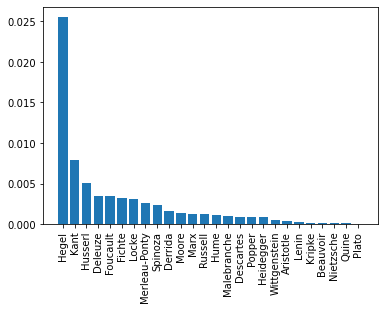

In [30]:
work_normalizer(df_pca, 'Topic0')

### Having Kant, Fichte, Hegel and even Husserl dominating this topic, the topic best identifies as German Idealism.

### Topic 1

In [31]:
topic_top5(agg_author_pca, 'Topic1')

""
author
Wollstonecraft
Beauvoir
Locke
Spinoza
Aristotle


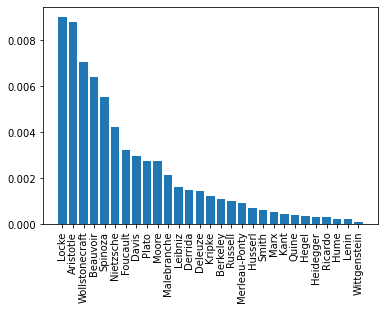

In [32]:
work_normalizer(df_pca, 'Topic1')

### Simon de Beauvoir and Mary Wollstonecraft are among the top authors for this topic. Therefore it would be classified as Feminism.

### Topic 2

In [33]:
topic_top5(agg_author_pca, 'Topic2')

""
author
Spinoza
Kant
Descartes
Fichte
Hume


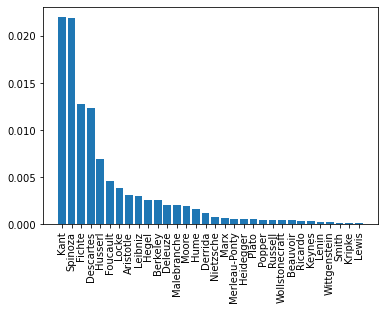

In [34]:
work_normalizer(df_pca, 'Topic2')

### Spinoza and Descartes are coming out as significant here but so are Kant and Fichte. So no final interpretation would be made for this topic yet. 

### Topic 3

In [35]:
topic_top5(agg_author_pca, 'Topic3')

""
author
Leibniz
Spinoza
Plato
Malebranche
Aristotle


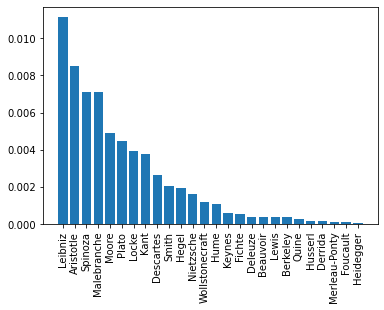

In [36]:
work_normalizer(df_pca, 'Topic3')

### Authors dominating this topic are from diverse schools. They discuss a wide variety of topics in their works. To better interpret this topic, the salient words would be given more weight. Having words such as GOOD, BAD, EVIL, PLEASURE, LOVE,  DESIRE, PLEASANT, RIGHT, VIRTUE, PAIN, MORAL and KIND, this topic would be designated as Ethics and Morality. 

### Topic 4

In [37]:
topic_top5(agg_author_pca, 'Topic4')

""
author
Ricardo
Marx
Keynes
Smith
Lenin


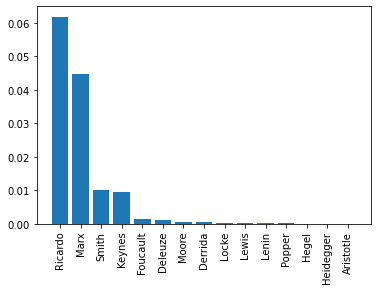

In [38]:
work_normalizer(df_pca, 'Topic4')

### Given both the word composition and the authors dominating this topic (Marx, Ricardo, Smith and Keynes), this topic is very easy to brand as Marxism/Capitalism.

### Topic 5

In [39]:
topic_top5(agg_author_pca, 'Topic5')

""
author
Kant
Moore
Wollstonecraft
Leibniz
Descartes


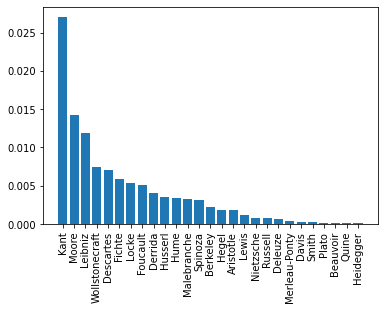

In [40]:
work_normalizer(df_pca, 'Topic5')

### Kant is heavily dominating this topic and given the salient words list, this topic would identify as Kantism.

### Topic 6

In [41]:
topic_top5(agg_author_pca, 'Topic6')

""
author
Descartes
Husserl
Heidegger
Fichte
Plato


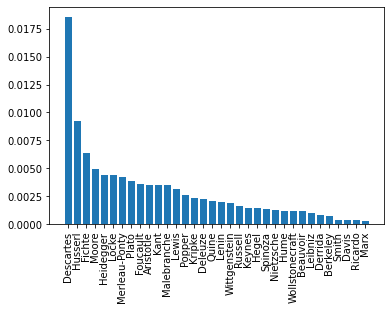

In [42]:
work_normalizer(df_pca, 'Topic6')

### Husserl and Heidegger are among the top philosophers here and by looking at the salient words list, this topic would be branded as Continental Philosophy.

### Topic 7

In [43]:
topic_top5(agg_author_pca, 'Topic7')

""
author
Spinoza
Descartes
Malebranche
Merleau-Ponty
Locke


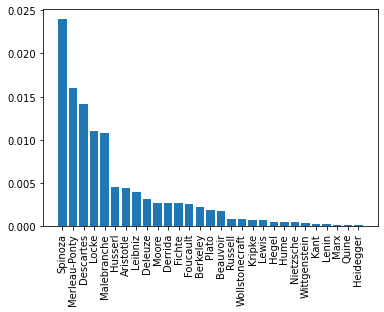

In [44]:
work_normalizer(df_pca, 'Topic7')

### Here, Spinoza and Descartes come out on top again, just like topic 2. By looking at the word's list in this topic and topic 2, these two topics would be combined together as Rationalism. 

### Topic 8

In [45]:
topic_top5(agg_author_pca, 'Topic8')

""
author
Kant
Merleau-Ponty
Hume
Russell
Spinoza


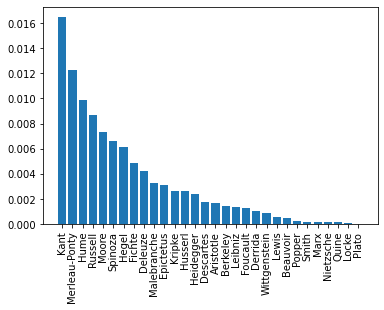

In [46]:
work_normalizer(df_pca, 'Topic8')

### The presence of David Hume in the top authors list here,combined with the word composition for this topic, makes it a good candidate to present Empiricism/Idealism.

### Topic 9

In [47]:
topic_top5(agg_author_pca, 'Topic9')

""
author
Moore
Husserl
Berkeley
Russell
Kripke


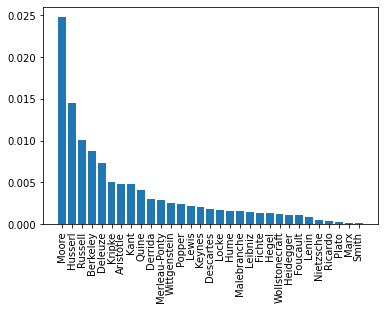

In [48]:
work_normalizer(df_pca, 'Topic9')

### Russel and Moore being on top here, make this topic closest to Analytic philosophy. 

## Conclusion

### To recap, using EDA and domain knowledge, topic evaluation and interpretation were performed on the raw topics and they have been tagged as follow:

Topic 0: __German Idealism__<br>
Topic 1: __Feminism__<br>
Topic 2 & 7: __Rationalism__<br>
Topic 3: __Ethics__<br>
Topic 4: __Marxism/Capitalism__<br>
Topic 5: __Kantism__<br>
Topic 6: __Continental__<br>
Topic 8: __Empiricism/Idealism__<br>
Topic 9: __Analytic__<br>